In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15713774.0,Hsieh,683.0,Germany,Male,49.0,7.0,123837.86,2.0,1.0,1.0,138700.75,1.0
1,1,15682533.0,Hs?eh,608.0,France,Female,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0.0
2,2,15791550.0,Tsou,539.0,France,Female,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0.0
3,3,15762762.0,Chiawuotu,530.0,Spain,Female,39.0,8.0,0.00,2.0,0.0,0.0,177896.93,0.0
4,4,15756475.0,Nnamdi,613.0,France,Female,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0.0


In [5]:
df.shape

(15000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [7]:
df.isna().mean()*100

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
var_num = df.select_dtypes(include=['int','float'])
var_cat = df.select_dtypes(include=['object','category'])

display(var_num.describe().T)
display(var_cat.describe().T)



,count,mean,std,min,25%,50%,75%,max
id,15000.0,7.499500e+03,4.330271e+03,0.00,3749.75,7499.50,11249.25,1.499900e+04
CustomerId,15000.0,1.570073e+07,1.162730e+06,155715.10,15633870.00,15690175.00,15759717.00,1.562648e+08
CreditScore,15000.0,6.587018e+02,8.023835e+01,431.00,602.00,661.00,709.00,4.818000e+03
Age,15000.0,3.766080e+01,8.106408e+00,18.00,32.00,37.00,42.00,7.200000e+01
Tenure,15000.0,5.038800e+00,2.810354e+00,0.00,3.00,5.00,7.00,1.000000e+01
Balance,15000.0,4.288883e+04,5.969588e+04,0.00,0.00,0.00,109844.81,2.070350e+05
NumOfProducts,15000.0,1.589467e+00,5.324296e-01,1.00,1.00,2.00,2.00,6.000000e+00
HasCrCard,15000.0,7.798000e-01,4.143952e-01,0.00,1.00,1.00,1.00,1.000000e+00
IsActiveMember,15000.0,4.978667e-01,5.000121e-01,0.00,0.00,0.00,1.00,1.000000e+00
EstimatedSalary,15000.0,1.178922e+05,4.557446e+04,11.58,82870.75,123583.85,157567.37,1.997613e+05


,count,unique,top,freq
Surname,15000,755,Ch'iu,311
Geography,15000,3,France,9048
Gender,15000,2,Male,8422


In [10]:
df['Exited'].value_counts()

Exited
0.0    12010
1.0     2990
Name: count, dtype: int64

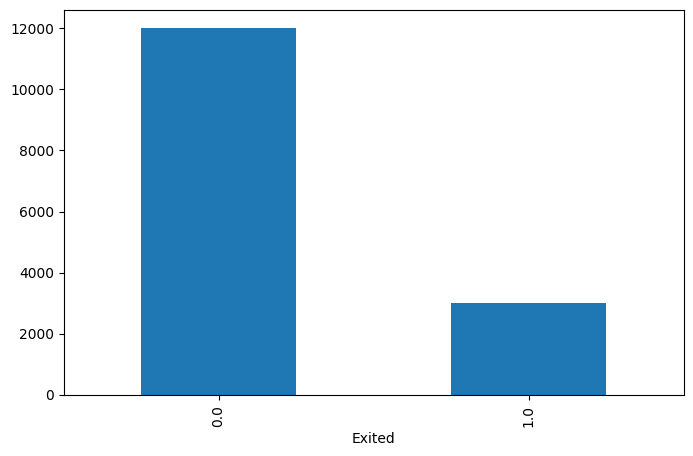

In [11]:
plt.figure(figsize=(8,5))
df['Exited'].value_counts().plot(kind='bar')
plt.show()

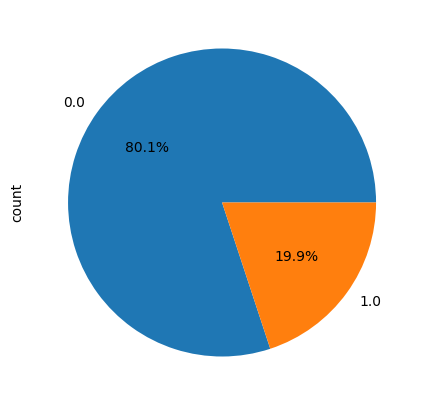

In [12]:
plt.figure(figsize=(8,5))
df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

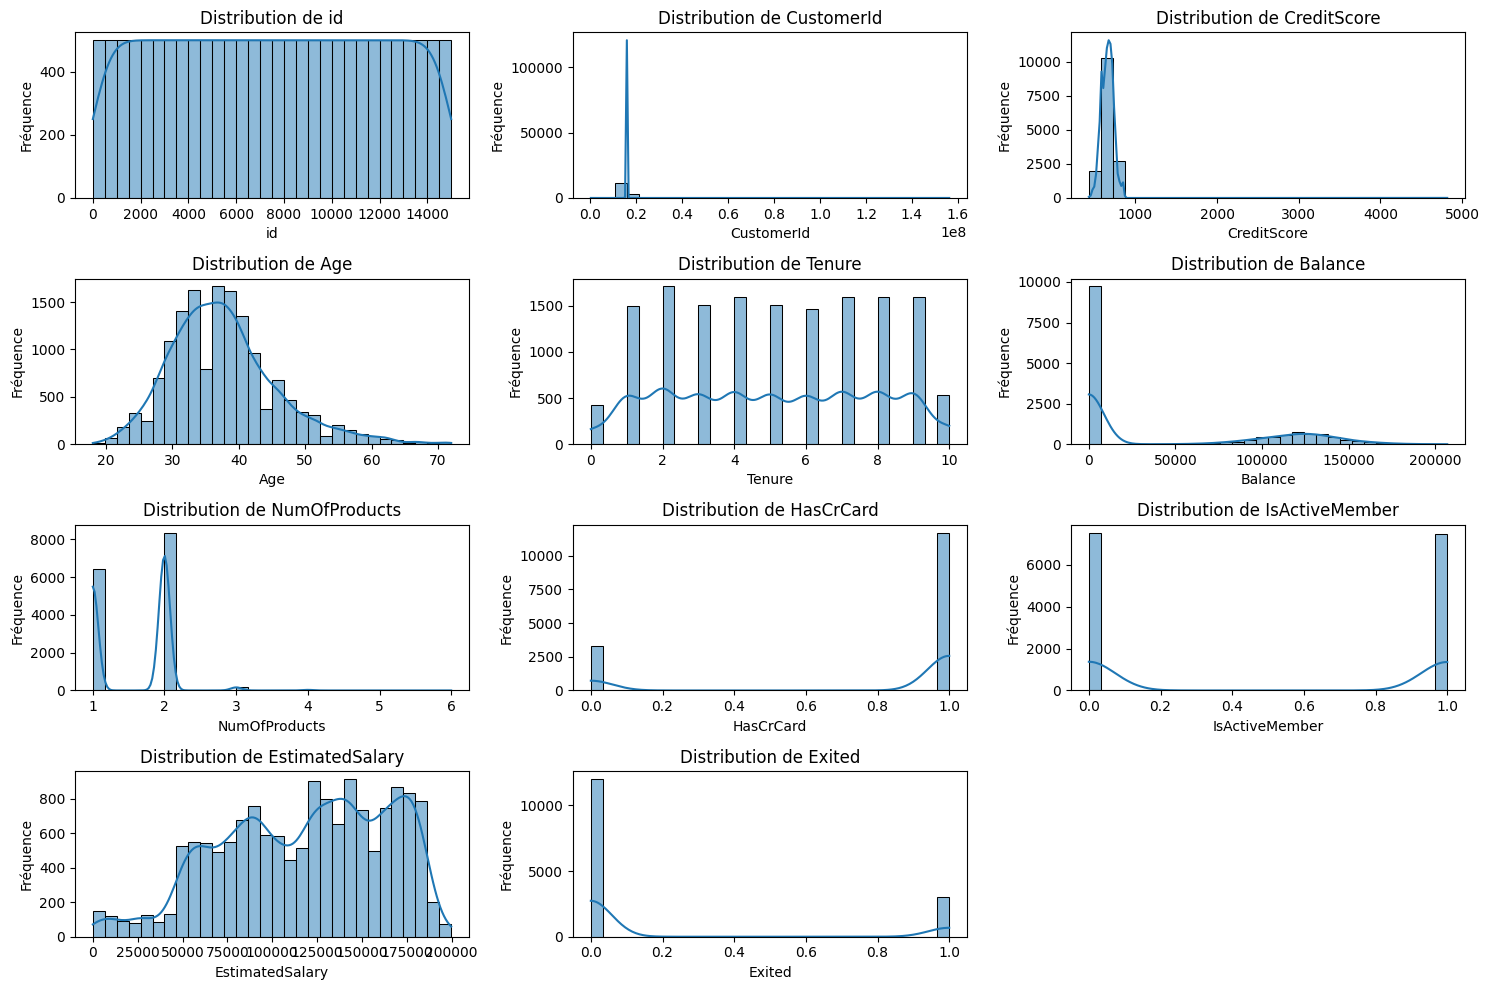

In [13]:
# Display distribution of numerical variables

plt.figure(figsize=(15, 10))
for i, column in enumerate(var_num, 1):
    plt.subplot(4, 3, i)  # 3 lignes, 2 colonnes
    sns.histplot(var_num[column], kde=True, bins=30)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [24]:
df['Exited'] = df['Exited'].astype('int')

<Axes: ylabel='count'>

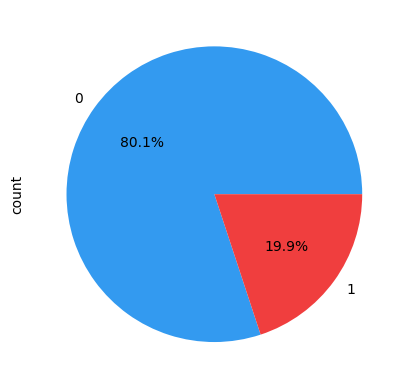

In [25]:
df["Exited"].value_counts().plot(kind='pie',autopct='%1.1f%%', colors=['#339af0', '#f03e3e'])

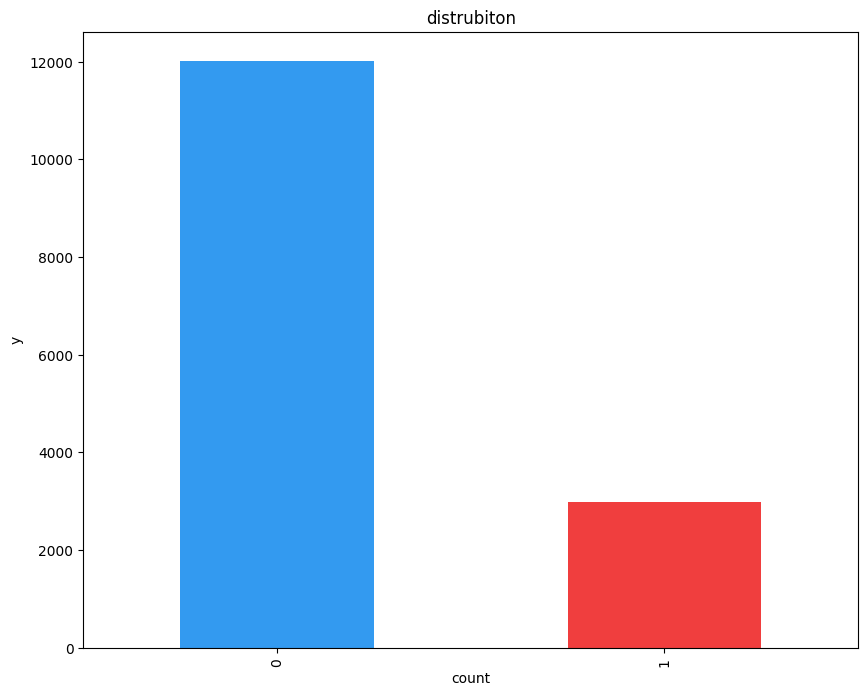

In [26]:
plt.figure(figsize=(10,8))
df["Exited"].value_counts().plot(kind='bar',color=['#339af0', '#f03e3e'])
plt.title('distrubiton')
plt.xlabel("count")
plt.ylabel('y')
plt.show()

In [27]:
df['Exited'].value_counts()

Exited
0    12010
1     2990
Name: count, dtype: int64

<Axes: ylabel='count'>

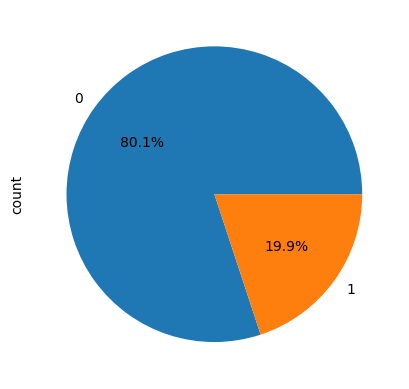

In [28]:
df['Exited'].value_counts().plot(kind='pie',autopct='%1.1f%%')

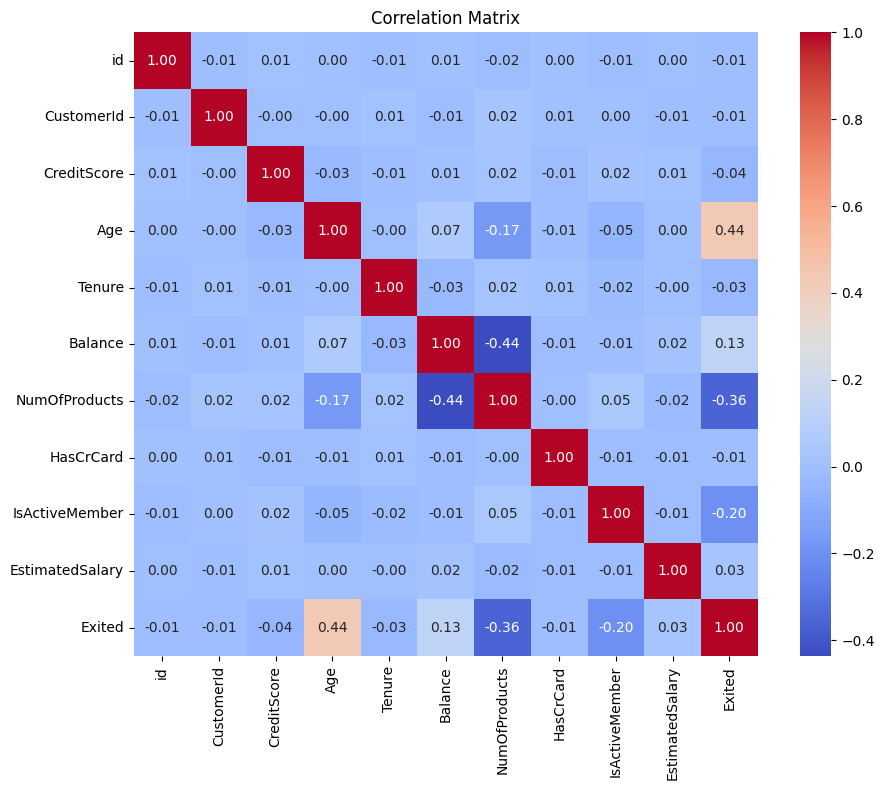

In [36]:
plt.figure(figsize=(10,8))
corr = var_num.corr('spearman')
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Display distribution of numerical variables

plt.figure(figsize=(15, 10))
for i, column in enumerate(var_num, 1):
    plt.subplot(4, 3, i)  # 3 lignes, 2 colonnes
    sns.histplot(var_num[column], kde=True, bins=30)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import kstest

results = []

for col in var_num.columns:
    data = df_train[col].dropna()

    # Normalization 
    data_norm = (data - data.mean()) / data.std()

    # KS test vs normal distribution
    ks_stat, p_value = kstest(data_norm, 'norm')

    # Conclusion on normality
    is_normal = "Yes" if p_value >= 0.05 else "No"

    results.append([col, ks_stat, p_value, is_normal])

# Final results DataFrame
ks_df = pd.DataFrame(results, columns=["Variable", "KS_statistic", "p_value", "Is_Normal"])
print(ks_df)